# Louvain

This notebook illustrates the clustering of a graph by the [Louvain algorithm](https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering).

In [ ]:
from IPython.display import SVG

In [1]:
import numpy as np

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/types/containers.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [2]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.clustering import Louvain, BiLouvain, modularity, bimodularity
from sknetwork.utils import bipartite2undirected
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## Undirected graphs

**Loading**

In [3]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position

**Clustering**

In [4]:
louvain = Louvain()
labels = louvain.fit_transform(adjacency)

In [5]:
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1 2 3] [12 11  6  5]


**Visualization**

In [6]:
image = svg_graph(adjacency, position, labels=labels)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


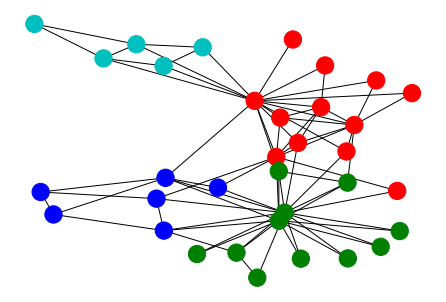

In [7]:
SVG(image)

**Metrics**

In [9]:
modularity(adjacency, labels)

0.4188034188034188

**Parameters**

In [11]:
# resolution parameter
louvain = Louvain(resolution=2)
labels = louvain.fit_transform(adjacency)
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1 2 3 4 5 6] [7 7 6 6 4 2 2]


## Directed graphs

**Loading**

In [12]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

**Clustering**

In [13]:
louvain = Louvain()
labels = louvain.fit_transform(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

In [15]:
unique_labels, counts = np.unique(labels, return_counts=True)
print(unique_labels, counts)

[0 1 2] [5 5 4]


**Visualization**

In [16]:
image = svg_digraph(adjacency, position, names, labels)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


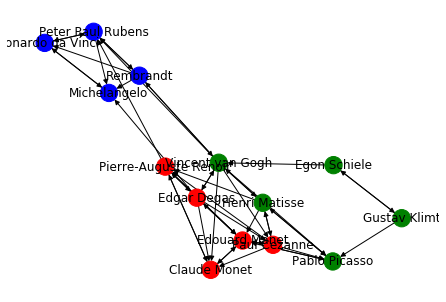

In [17]:
SVG(image)

**Metrics**

In [18]:
modularity(adjacency, labels)

0.32480000000000003

## Bipartite graphs

**Loading**

In [19]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col
position_row = graph.position_row
position_col = graph.position_col

**Clustering by BiLouvain**

In [20]:
bilouvain = BiLouvain()
bilouvain.fit(biadjacency)
labels_row = bilouvain.labels_row_
labels_col = bilouvain.labels_col_

BiLouvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

**Visualization**

In [ ]:
image = svg_bigraph(biadjacency, position_row, position_col, names_row, names_col, labels_row, labels_col)

In [ ]:
SVG(image)

**Metrics**

In [32]:
bimodularity(biadjacency, labels_row, labels_col)

0.5728732897085069

**Clustering by Louvain**

In [23]:
louvain = Louvain()
adjacency = bipartite2undirected(biadjacency)
labels = louvain.fit_transform(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, sorted_cluster=True, verbose=False)

In [24]:
n_row = biadjacency.shape[0]
labels_row = louvain.labels_[:n_row]
labels_col = louvain.labels_[n_row:]

[2 2 0 0 2 0 0 0 1 3 1 1 1 3 3] [2 2 2 0 0 0 2 0 0 1 1 3 3 1 3 1]


**Visualization**

In [ ]:
image = svg_bigraph(biadjacency, position_row, position_col, names_row, names_col, labels_row, labels_col)

In [ ]:
SVG(image)